In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df=pd.read_csv('Concrete_Data.csv')

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
x=df.drop(columns=["Concrete compressive strength(MPa, megapascals) "])
y=df.iloc[:,-1]

In [9]:
for i, col in enumerate(df.columns):
    print(i, repr(col))


0 'Cement (component 1)(kg in a m^3 mixture)'
1 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'
2 'Fly Ash (component 3)(kg in a m^3 mixture)'
3 'Water  (component 4)(kg in a m^3 mixture)'
4 'Superplasticizer (component 5)(kg in a m^3 mixture)'
5 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'
6 'Fine Aggregate (component 7)(kg in a m^3 mixture)'
7 'Age (day)'
8 'Concrete compressive strength(MPa, megapascals) '


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
# Applling Regression without any transformation
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)


0.6275531792314852

In [12]:
# Cross checking with cross val score
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.4609940491662865

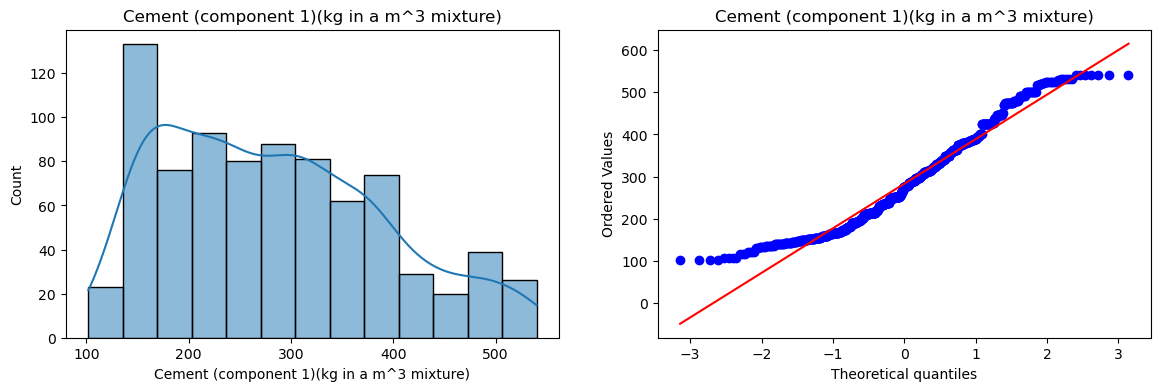

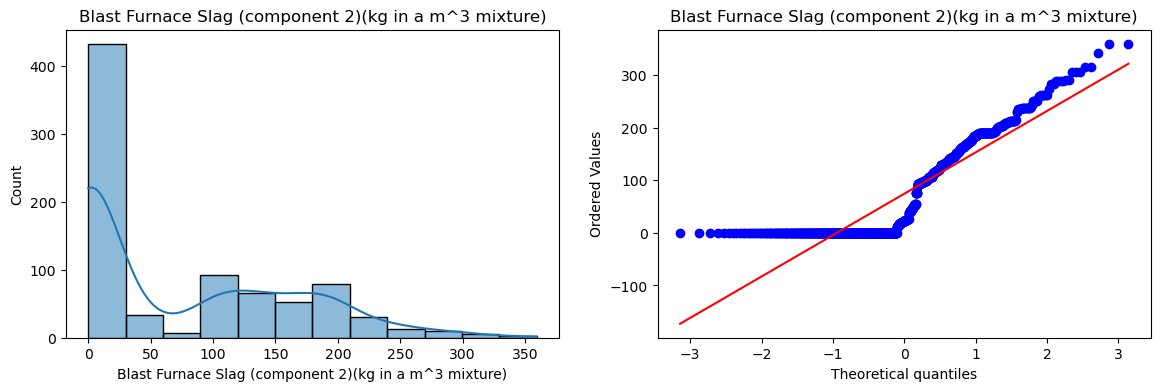

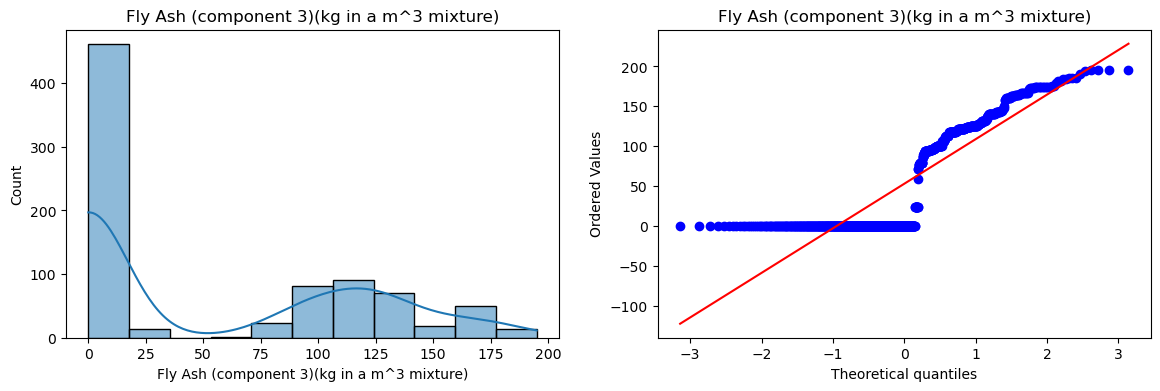

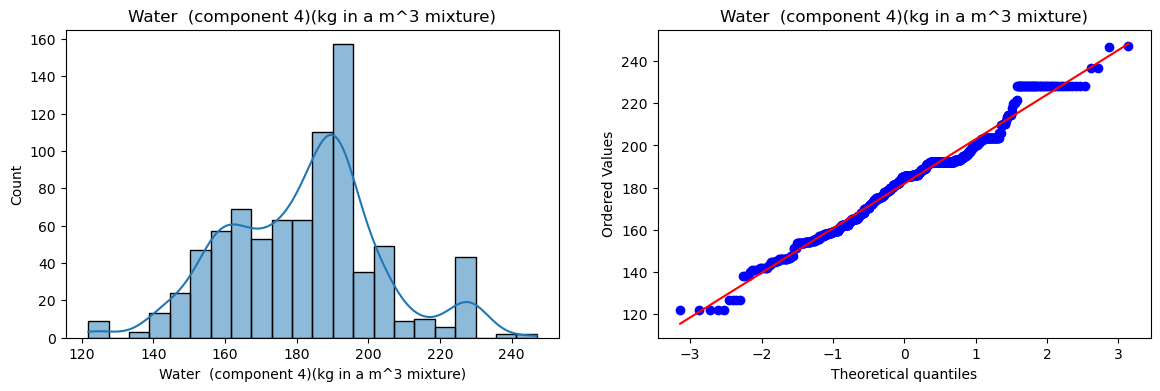

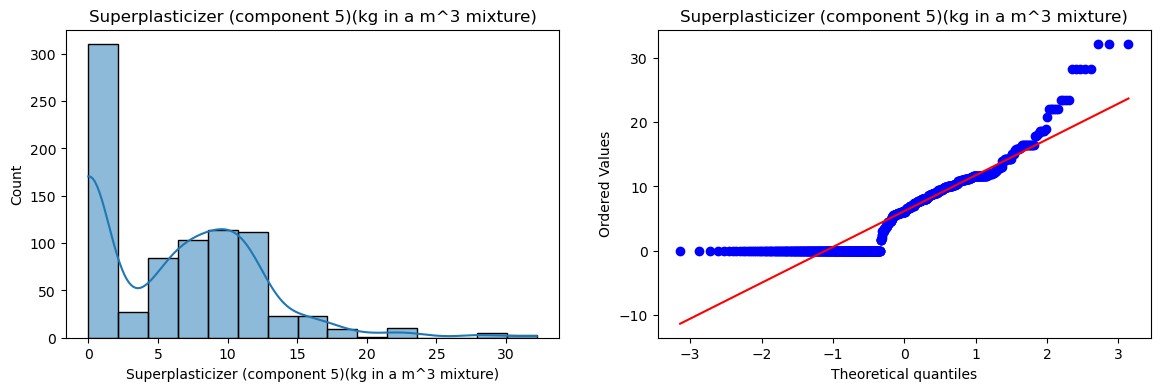

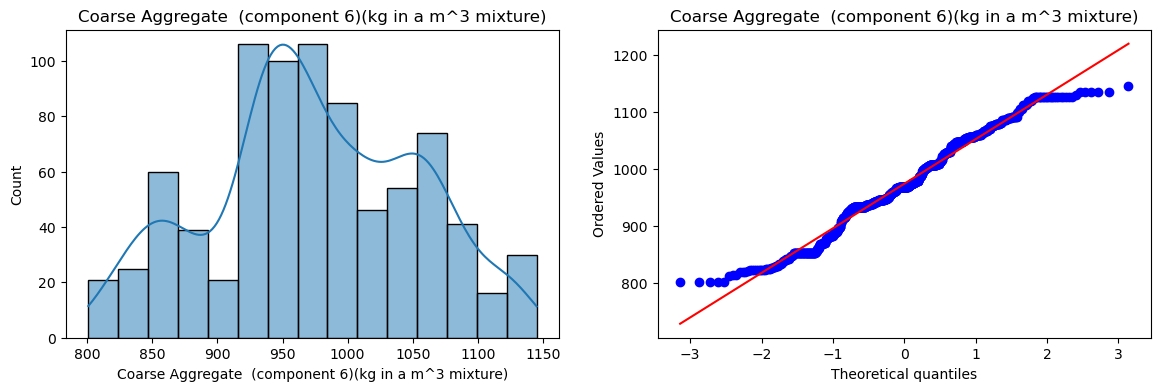

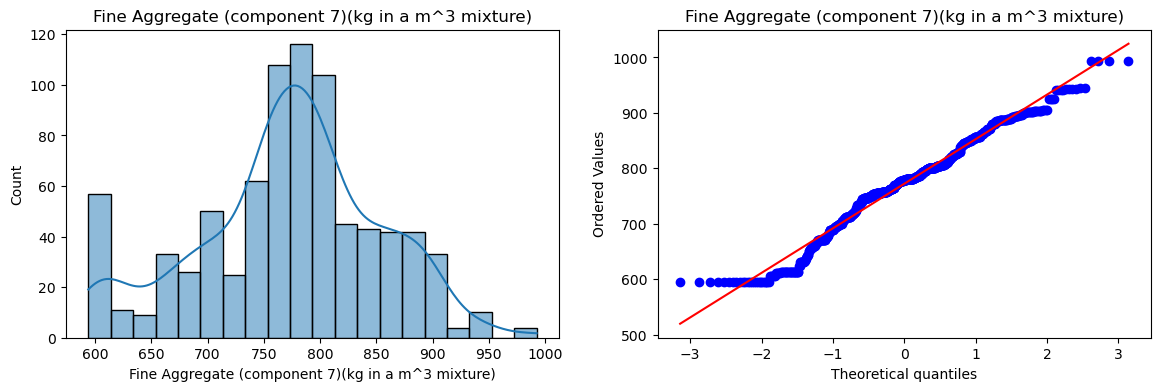

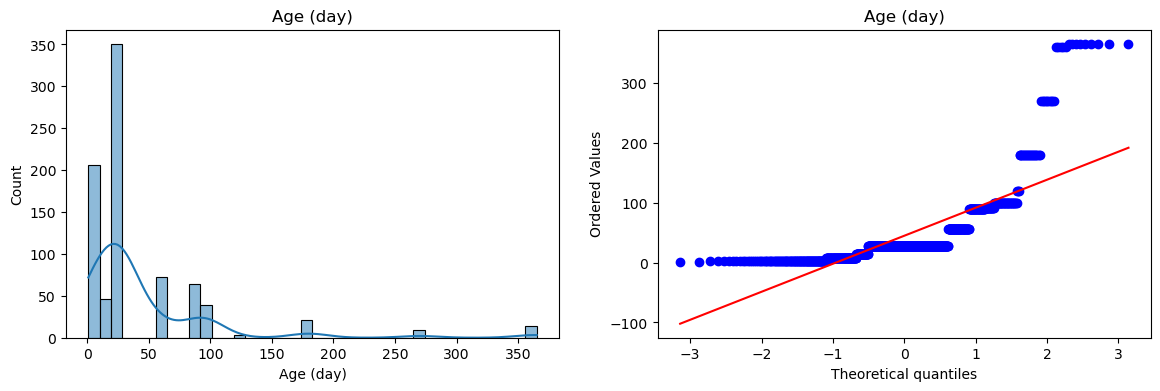

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

for col in x_train.columns:
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(1, 2, 2)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()


In [14]:
# Applying Box_Cox Transform

pt=PowerTransformer(method="box-cox")

x_train_transformed=pt.fit_transform(x_train+0.0000001)
x_test_transformed=pt.transform(x_test+0.0000001)

pd.DataFrame({'cols':x_train.columns,'box_cox_lambda':pt.lambdas_})

,cols,box_cox_lambda
0,Cement (component 1)(kg in a m^3 mixture),0.177025
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,0.022767
2,Fly Ash (component 3)(kg in a m^3 mixture),-0.034635
3,Water (component 4)(kg in a m^3 mixture),0.772682
4,Superplasticizer (component 5)(kg in a m^3 mix...,0.087141
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1.129813
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1.782018
7,Age (day),0.066631


In [15]:
# Applying linear regession on transformed data
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)

y_pred2=lr.predict(x_test_transformed)
r2_score(y_test,y_pred2)

0.8042534512206332

In [18]:
# Using cross val score
pt=PowerTransformer(method='box-cox')
x_transformed=pt.fit_transform(x+0.0000001)

lr=LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

0.6658537926845634

C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


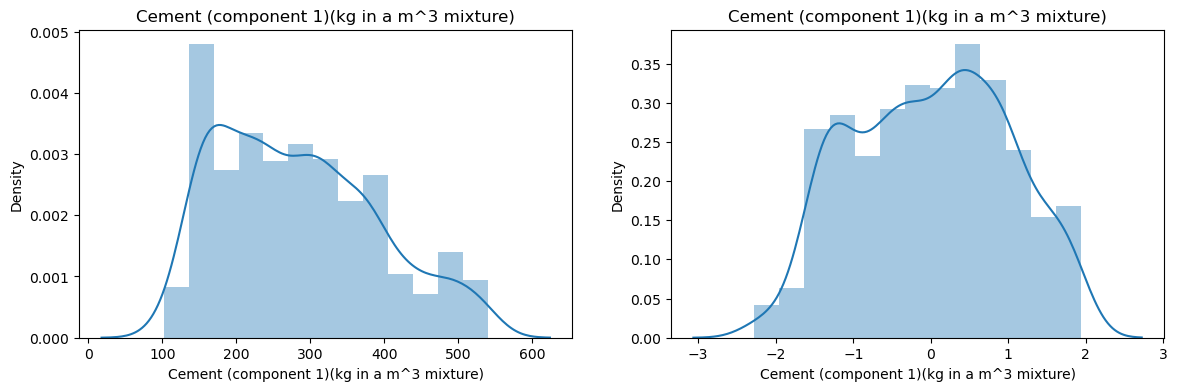

C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


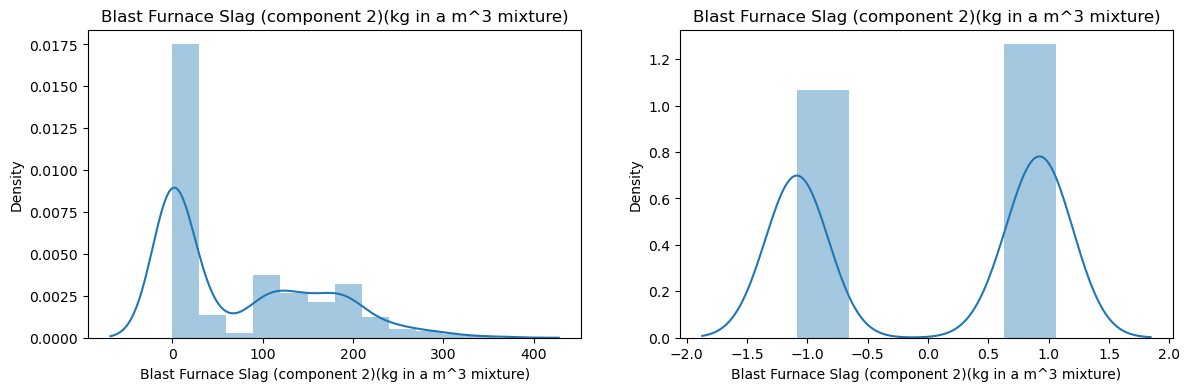

C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


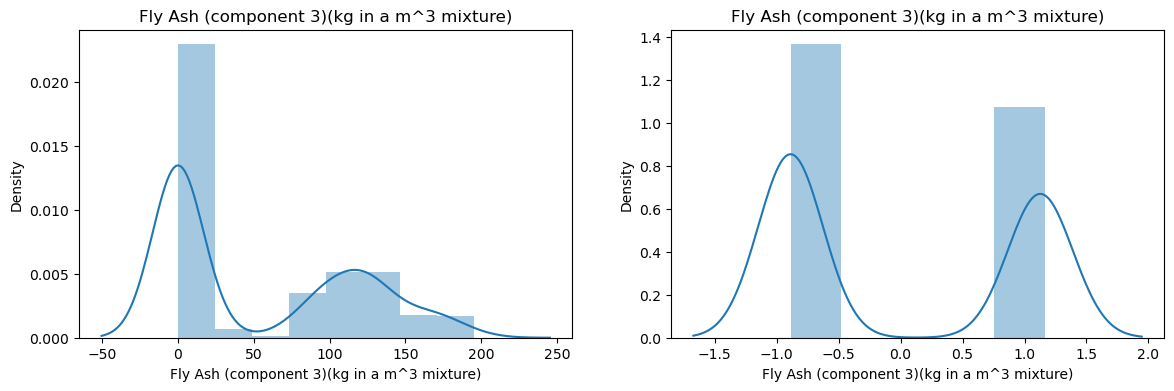

C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


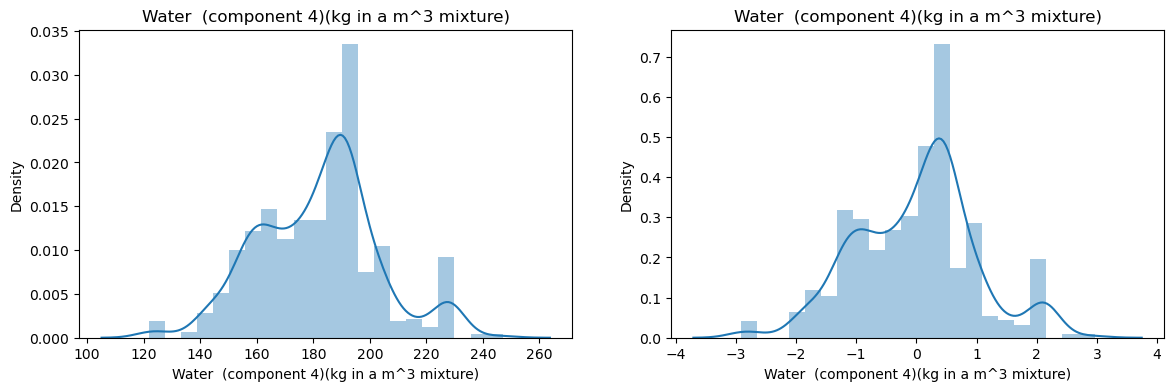

C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


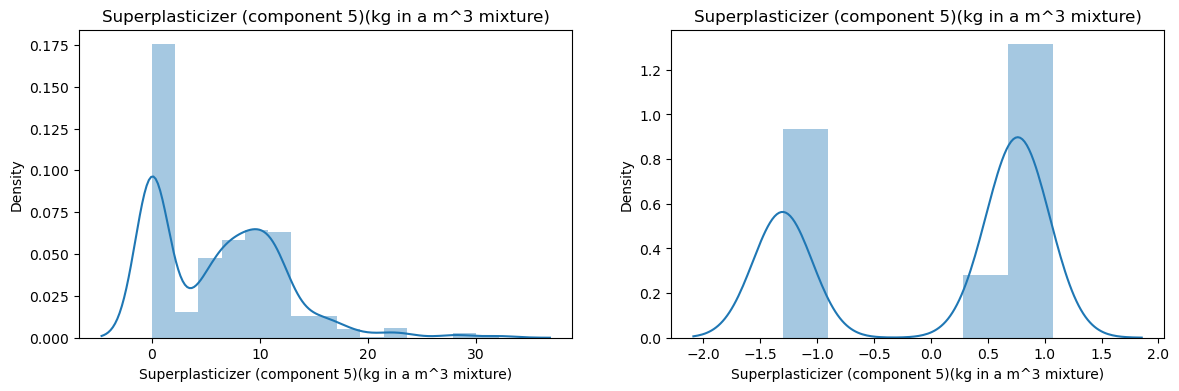

C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


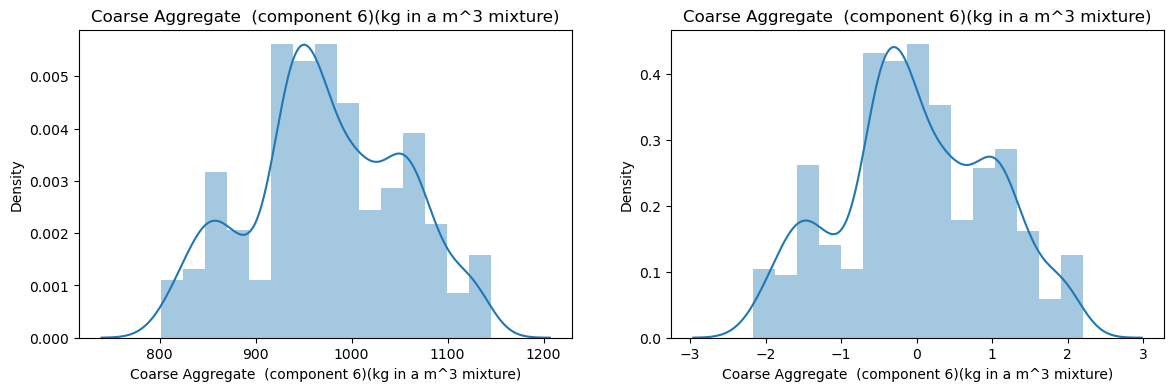

C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


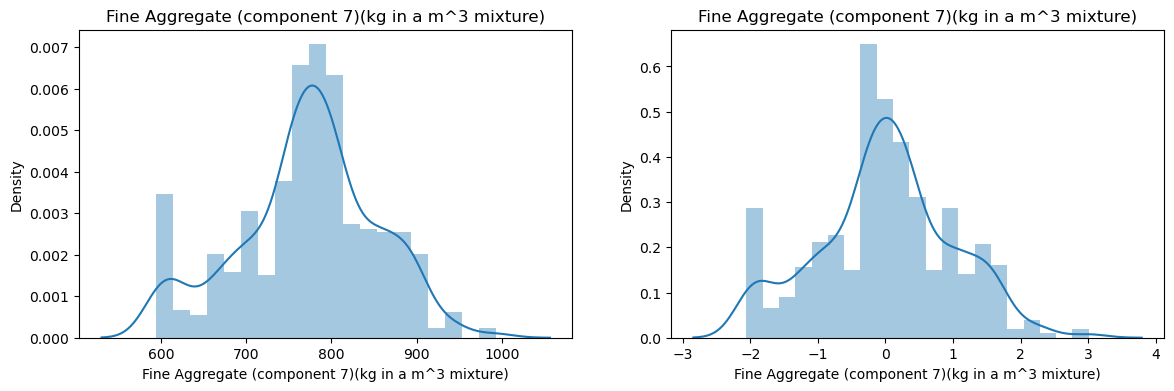

C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\shish\AppData\Local\Temp\ipykernel_10548\250489627.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_transformed[col])


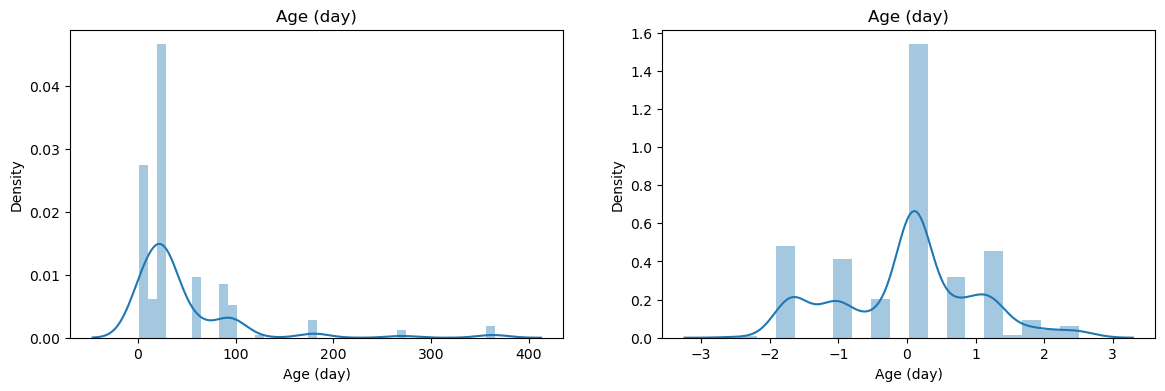

In [21]:
# Before and after comparision for Box-Cox Plot
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title(col)

    plt.show()

import warnings
warnings.filterwarnings("ignore")


In [23]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2,y_train)

y_pred3 = lr.predict(x_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513354853


,cols,Yeo_Johnson_lambdas
0,Cement (component 1)(kg in a m^3 mixture),0.174348
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,0.015715
2,Fly Ash (component 3)(kg in a m^3 mixture),-0.161447
3,Water (component 4)(kg in a m^3 mixture),0.771307
4,Superplasticizer (component 5)(kg in a m^3 mix...,0.253935
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1.130050
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1.783100
7,Age (day),0.019885


In [25]:
# applying cross val score

pt = PowerTransformer()
x_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed2,y,scoring='r2'))

0.6834625141500864

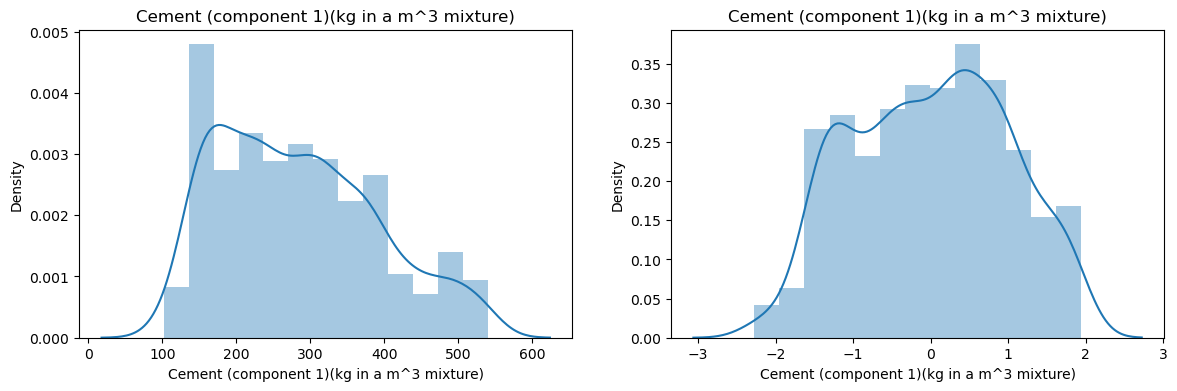

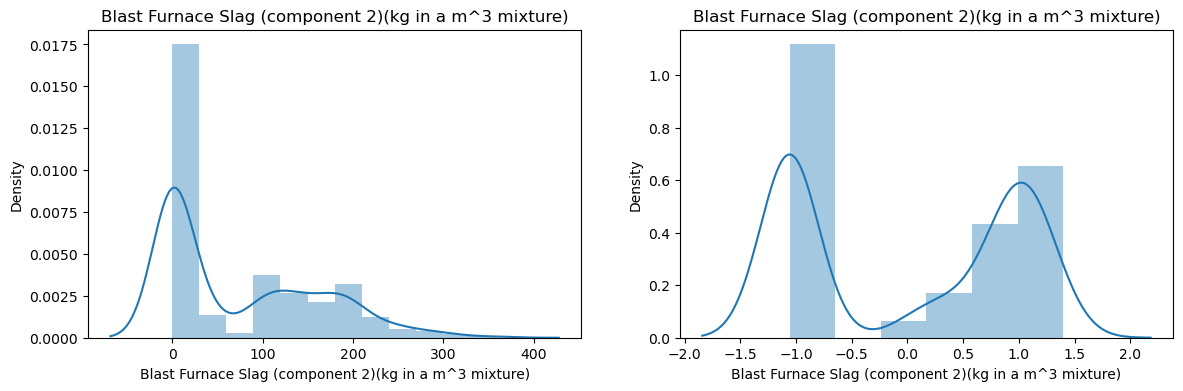

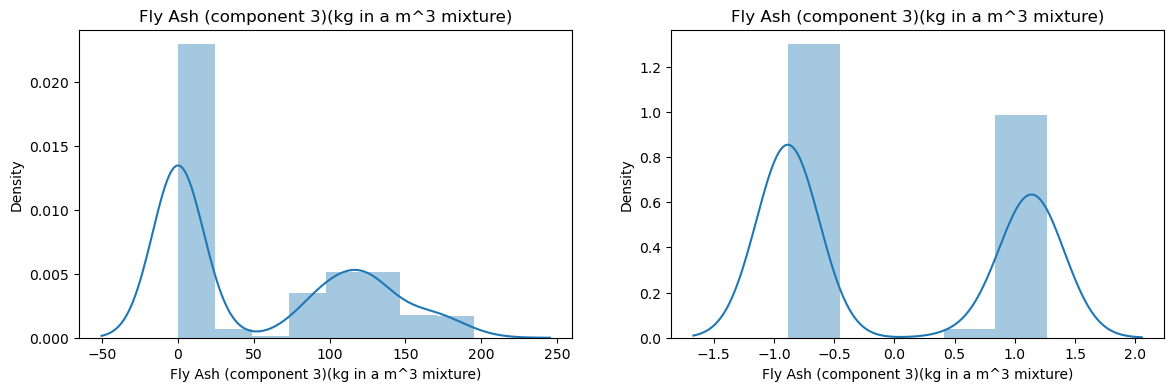

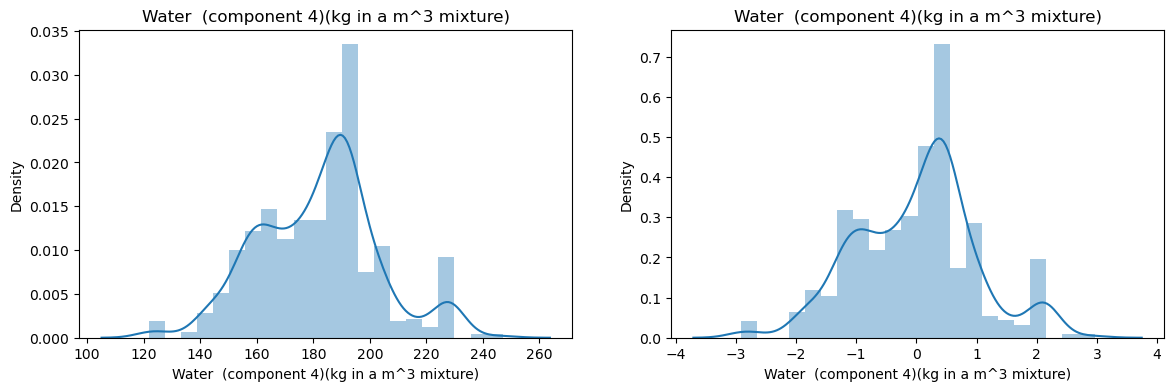

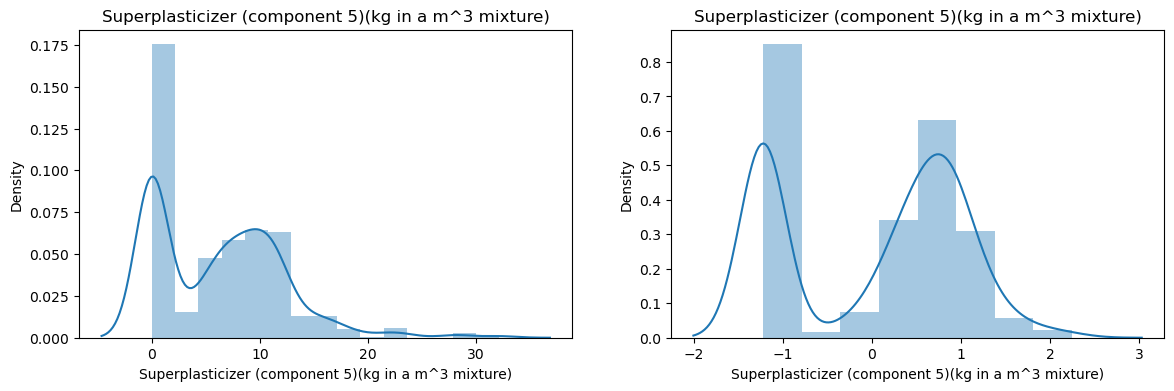

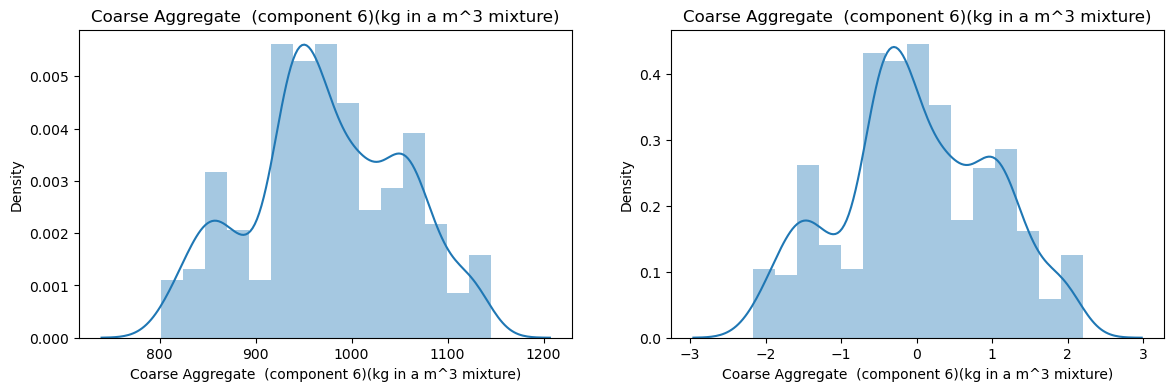

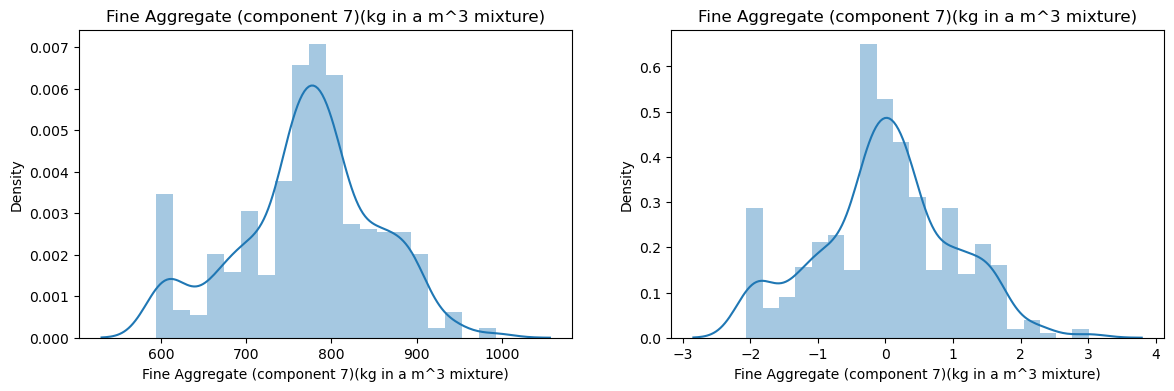

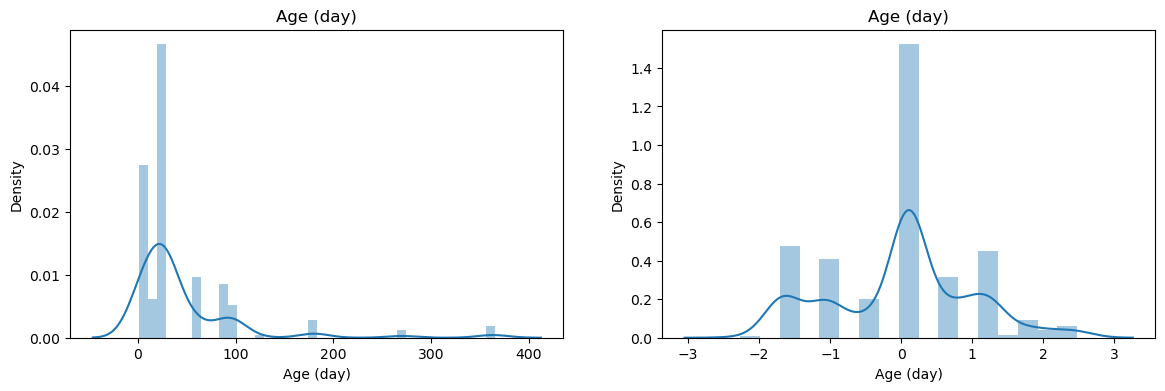

In [30]:
# Before and after comparision for Yeo-Johnson

x_train_transformed2 = pd.DataFrame(x_train_transformed2,columns=x_train.columns)

for col in x_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_train_transformed2[col])
    plt.title(col)

    plt.show()

In [32]:
# Side by side Lambdas
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement (component 1)(kg in a m^3 mixture),0.169544,0.174348
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,0.016633,0.015715
2,Fly Ash (component 3)(kg in a m^3 mixture),-0.136480,-0.161447
3,Water (component 4)(kg in a m^3 mixture),0.808438,0.771307
4,Superplasticizer (component 5)(kg in a m^3 mix...,0.264160,0.253935
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1.129395,1.130050
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1.830763,1.783100
7,Age (day),0.001771,0.019885
